# 儲存擷取資料

- 之前我們練習的是擷取語料。語料其實就是一篇篇的文本，只要把檔案單純存在本機硬碟/隨身碟中即可。
- 但是，如果是分類的資料呢？
- 比如：http://archive.ics.uci.edu/ml/machine-learning-databases/iris
- 這個網站，從URL可以得知，是拿來做機器學習練習的資料網站。
- iris是鳶尾花，iris.data其實是個CSV檔，其中的值以逗號分開。
- 這個檔案中有五個欄位：花萼長度(sepal length)、花萼寬度(sepal width)、花瓣長度(petal length)、花瓣寬度(pedal width)、鳶尾花類別(species, 有setosa, versicolor, virginica等三種)
- 如果我們想分析這些資料，應該怎麼辦呢？
- 當然，我們可以用Excel把資料讀進去，再做其他。
- 我們會使用Python及爬蟲，我們可以利用這些技術，配合pandas這個模組，來達成相同的成果。
- 我們先在scraping這個環境下安裝pandas：conda install -c anaconda pandas
- 然後，檢視一下上面的網站。我們發現，要做的其實是把iris.data下載下來，並不需要處理HTML標記。
- 所以....

In [1]:
import requests

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

try:
    html = requests.get(url)
    print('下載成功')
except Exception as err:
    print('下載失敗')
    
file = 'iris.csv'
with open('file', 'wb') as fileobj:
    for diskstorage in html.iter_content(10240):
        size = fileobj.write(diskstorage)

下載成功


## 程式說明

- with open() as ...
    1. 這個其實跟我們之前學的open功能相同，唯一的不同是：用這個做法，我們不需要關閉檔案，因為會自動關閉。
    1. f = open(...); f.read()/f.write(); f.close()
    1. 上面的 f，在with open as的格式下放在 as 之後。
    1. <img src='ExtractData01.png'>
    1. <img src='ExtractData02.png'>
    1. <img src='ExtractData03.png'>

- response.iter_content()：可以自訂一次要寫入多少位元，預設值為512 bytes。故上面的程式是說：每10240 bytes的資料，寫入一次。

- 下載了上述資料後，我們會希望把資料做類似Excel的分欄、分列整理。
- 這個時候，可以使用pandas：

In [4]:
import pandas as pd

colName = ['sepal_len', 'sepal_wd', 'petal_len', 'petal_wd', 'species']
iris = pd.read_csv('iris.csv', names = colName)
print('資料集長度：', len(iris))
print(iris)

pd.set_option('display.max_rows',None)         # 取消pandas列印上的省略，完整印出
print(iris)

資料集長度： 150
     sepal_len  sepal_wd  petal_len  petal_wd         species
0          5.1       3.5        1.4       0.2     Iris-setosa
1          4.9       3.0        1.4       0.2     Iris-setosa
2          4.7       3.2        1.3       0.2     Iris-setosa
3          4.6       3.1        1.5       0.2     Iris-setosa
4          5.0       3.6        1.4       0.2     Iris-setosa
..         ...       ...        ...       ...             ...
145        6.7       3.0        5.2       2.3  Iris-virginica
146        6.3       2.5        5.0       1.9  Iris-virginica
147        6.5       3.0        5.2       2.0  Iris-virginica
148        6.2       3.4        5.4       2.3  Iris-virginica
149        5.9       3.0        5.1       1.8  Iris-virginica

[150 rows x 5 columns]
     sepal_len  sepal_wd  petal_len  petal_wd          species
0          5.1       3.5        1.4       0.2      Iris-setosa
1          4.9       3.0        1.4       0.2      Iris-setosa
2          4.7       3.2        

In [5]:
# 描述性統計，樣本數、平均、標準差、最小值、第一四分位數、第二四分位數(=中位數)、第三四分位數、最大值
iris.describe()  

,sepal_len,sepal_wd,petal_len,petal_wd
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


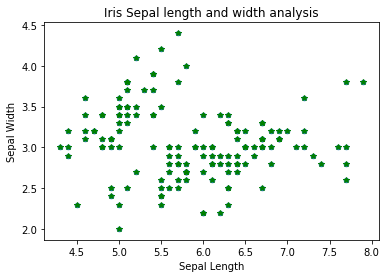

In [2]:
# 繪散佈圖

import pandas as pd
import matplotlib.pyplot as plt

colName = ['sepal_len', 'sepal_wd', 'petal_len', 'petal_wd', 'species']
iris = pd.read_csv('iris.csv', names = colName)
iris.plot(x='sepal_len', y='sepal_wd', kind='scatter')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Sepal length and width analysis')
#plt.show()  # plt.show()在jupyter notebook中不顯現
plt.plot(iris['sepal_len'], iris['sepal_wd'], '*', color='g')

# 匯入網頁表格資料

- pandas可以用 read_html('url')的方式來匯入網頁資料並轉成pandas的DataFrame
- 我們試用在：http://www.stockq.org 。 點選市場動態，再點選全球匯率行情。

In [4]:
# 首先，用 pandas.read_html()把全球貨幣匯率表格讀進來

import pandas as pd

url = 'http://www.stockq.org/market/currency.php'
currencies = pd.read_html(url)
print(type(currencies))
print(currencies)

<class 'list'>
[                                                   0
0  首頁 市場動態 歷史股價 基金淨值 基金分類 經濟數據總覽 美元定存  技術指標 期貨報告 ...,                                                    0
0  首頁 市場動態 歷史股價 基金淨值 基金分類 經濟數據總覽 美元定存  技術指標 期貨報告 ...,     0   1
0 NaN NaN,                                                    0     1
0  首頁 市場動態 歷史股價 基金淨值 基金分類 經濟數據總覽 美元定存  技術指標 期貨報告 ...  简体中文,                                                    0  \
0  市場動態 全球股市排行榜 相對低檔股市指數 相對高檔股市指數 亞洲股市指數 歐洲股市、非洲指...   

                                                   1  
0  全球貨幣匯率 刷新時間 2019/12/24 11:02:43  全球匯率 (Currenc...  ,                                                    0
0  市場動態 全球股市排行榜 相對低檔股市指數 相對高檔股市指數 亞洲股市指數 歐洲股市、非洲指...,                                  0   1
0  全球貨幣匯率 刷新時間 2019/12/24 11:02:43 NaN,                            0                         1  \
0   全球匯率 (Currency Exchange)  全球匯率 (Currency Exchange)   
1                         貨幣                        匯率   
2                      歐元/美元                  

In [5]:
# 進一步分析一下讀進來的結果，看需要哪些資料

item = 0

for currency in currencies:
    print('元素：', item)
    print(currency)
    print()
    item+=1
    
'''
從下面的結果可以看出，我們只需要currencies這個表列中
index為7的成員，這個成員有0-4四個標題，以下顯示分成
不同段落了
'''

元素： 0
                                                   0
0  首頁 市場動態 歷史股價 基金淨值 基金分類 經濟數據總覽 美元定存  技術指標 期貨報告 ...

元素： 1
                                                   0
0  首頁 市場動態 歷史股價 基金淨值 基金分類 經濟數據總覽 美元定存  技術指標 期貨報告 ...

元素： 2
    0   1
0 NaN NaN

元素： 3
                                                   0     1
0  首頁 市場動態 歷史股價 基金淨值 基金分類 經濟數據總覽 美元定存  技術指標 期貨報告 ...  简体中文

元素： 4
                                                   0  \
0  市場動態 全球股市排行榜 相對低檔股市指數 相對高檔股市指數 亞洲股市指數 歐洲股市、非洲指...   

                                                   1  
0  全球貨幣匯率 刷新時間 2019/12/24 11:02:43  全球匯率 (Currenc...  

元素： 5
                                                   0
0  市場動態 全球股市排行榜 相對低檔股市指數 相對高檔股市指數 亞洲股市指數 歐洲股市、非洲指...

元素： 6
                                 0   1
0  全球貨幣匯率 刷新時間 2019/12/24 11:02:43 NaN

元素： 7
                           0                         1  \
0   全球匯率 (Currency Exchange)  全球匯率 (Currency Exchange)   
1                         貨幣                        匯率   
2             

In [8]:
# 現在可以把上面擷取的資料放進pandas DataFrame中

import pandas as pd

url = 'http://www.stockq.org/market/currency.php'
currencies = pd.read_html(url)

pd.set_option('display.unicode.ambiguous_as_wide', True)   # 亞洲字元的對齊，如果沒有，會歪掉
pd.set_option('display.unicode.east_asian_width', True)

currency = currencies[7]                                   # 讀取index=7的成員
currency = currency.drop(currency.index[[0,1]])            # 抛棄前兩列 (就是"0全球匯率 (Currency Exchange)及貨幣 匯率 "這兩個標頭
currency.columns=['貨幣', '匯率', '漲跌', '比例', '台北']   # 建立行的標題
currency.index = range(len(currency.index))                # 建立列的標題(列號)
print(currency)

             貨幣     匯率     漲跌    比例   台北
0       歐元/美元   1.1087   0.0001   0.01%  11:10
1       英鎊/美元   1.2945   0.0014   0.11%  11:10
2   美元/瑞士法郎   0.9822   0.0006   0.06%  11:10
3   美元/瑞典克朗   9.4310   0.0021   0.02%  11:10
4     美元/俄盧布  62.2680   0.0000   0.00%  06:00
5   美元/匈牙利幣   298.74     0.15   0.05%  11:10
6   美元/土耳其幣   5.9454   0.0008   0.01%  11:10
7     美元/南非幣  14.2188   0.0216   0.15%  11:10
8   美元/以色列幣   3.4732   0.0024   0.07%  11:10
9     美元/摩洛哥   9.6300   0.0043   0.04%  11:10
10      澳幣/美元   0.6917  -0.0004  -0.07%  11:10
11      紐幣/美元   0.6628  -0.0004  -0.06%  11:10
12      美元/日圓   109.39     0.01   0.00%  11:10
13    美元/人民幣   7.0118  -0.0006  -0.01%  11:10
14      美元/港幣   7.7856  -0.0013  -0.02%  11:10
15      美元/台幣   30.155    0.029   0.10%  11:10
16      美元/韓圜  1162.71    -0.33  -0.03%  11:10
17      美元/泰銖   30.170    0.035   0.12%  10:51
18      美元/新元   1.3558   0.0006   0.04%  11:10
19    美元/菲披索   50.820    0.020   0.04%  10:38
20    美元/馬來幣   4.1400   0.0015   0